# Objective
1. check the accuracy of MFS by using the frequency in file
2. check the candidates distribution of left and right head

In [64]:
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import run_bert_link_prediction as link_prediction

# Set up folder

In [3]:
webchild_file = "./data/wc/property.txt"
cskg_file = "./data/cskg/cskg_connected.tsv"
ground_truth="./data/cskg/ground_truth_100.tsv"
web_child = "./data/wc/train.tsv"

In [4]:
def load_file(filename):
    with open(filename, "r", errors="replace") as f:
        lines = []
        for line in f:
            lines.append(line.strip().split("\t"))
    return lines

In [5]:
lines = load_file(webchild_file)

In [6]:
lines[0]

['aardvark#n#1',
 'manner#n#1',
 'adorable#a#1',
 'aardvark',
 'adorable',
 '130',
 '1',
 '1',
 '2gms,',
 '1',
 'a']

In [7]:
# build head id frequency
entity_dict = dict()

for line in lines:
    entity1 = wn.synset(line[0].replace("#",".").replace(" ","_"))
    entity2 = wn.synset(line[2].replace("#",".").replace(" ","_"))
    entity_dict[entity1]=entity_dict.get(entity1,0)+1
    entity_dict[entity2]=entity_dict.get(entity2,0)+1

In [7]:
# check the candidates distribution for two head

left_distribution = []
right_distribution = []
count = 0

for line in lines:
    count += 1
    entity1_label=line[3].replace(" ","_")
    entity2_label=line[4].replace(" ","_")
    
    left_candit_num = len(wn.synsets(entity1_label))
    right_candit_num = len(wn.synsets(entity2_label))
    
    left_distribution.append(left_candit_num)
    right_distribution.append(right_candit_num)
    
    if count%1000==0:
        print(f"\r {count}/{len(lines)}", end="")
print(f"{count}/{len(lines)}", end="")

 6509000/65098896509889/6509889

(array([4.432689e+06, 3.617070e+05, 2.674400e+05, 2.317620e+05,
        1.937870e+05, 1.671740e+05, 1.394370e+05, 1.082240e+05,
        9.311400e+04, 7.775900e+04, 6.951800e+04, 4.748900e+04,
        5.175300e+04, 3.899500e+04, 5.452000e+04, 2.051500e+04,
        2.735400e+04, 1.229500e+04, 1.016200e+04, 9.437000e+03,
        1.768600e+04, 1.190300e+04, 5.714000e+03, 4.377000e+03,
        1.338000e+03, 3.313000e+03, 3.904000e+03, 2.548000e+03,
        4.461000e+03, 4.925000e+03, 1.439000e+03, 4.974000e+03,
        0.000000e+00, 6.689000e+03, 1.380000e+02, 2.453000e+03,
        1.550000e+02, 3.742000e+03, 1.540000e+03, 2.926000e+03,
        7.400000e+02, 1.157000e+03, 3.256000e+03, 1.498000e+03,
        0.000000e+00, 0.000000e+00, 1.800000e+01, 7.000000e+00,
        8.200000e+01, 0.000000e+00, 2.970000e+02, 0.000000e+00,
        0.000000e+00, 1.227000e+03, 0.000000e+00, 0.000000e+00,
        4.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

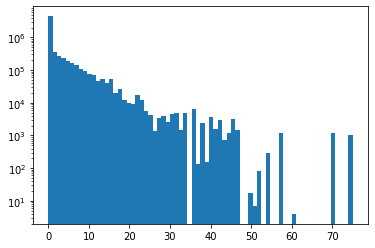

In [8]:
plt.hist(left_distribution, bins=70, log=True)

(array([1.319029e+06, 6.117610e+05, 5.622770e+05, 4.993300e+05,
        3.495600e+05, 3.710970e+05, 1.064970e+05, 2.864580e+05,
        2.526820e+05, 1.622760e+05, 2.979250e+05, 2.557890e+05,
        8.574800e+04, 9.264400e+04, 2.332440e+05, 9.315000e+04,
        1.263850e+05, 2.274800e+04, 2.369100e+04, 7.278700e+04,
        1.975090e+05, 2.258600e+04, 3.549900e+04, 5.697800e+04,
        8.200000e+01, 1.815520e+05, 9.640000e+02, 0.000000e+00,
        2.794200e+04, 1.199200e+04, 0.000000e+00, 6.000000e+00,
        1.837000e+03, 0.000000e+00, 2.821200e+04, 8.319000e+03,
        3.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 4.373900e+04, 0.000000e+00, 2.429600e+04,
        0.000000e+00, 2.866700e+04, 0.000000e+00, 0.000000e+00,
        1.443700e+04, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        2.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 9.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

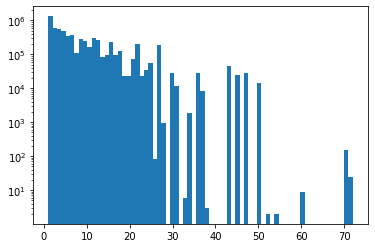

In [9]:
plt.hist(right_distribution, bins=70, log=True)

In [10]:
sum(left_distribution)/len(left_distribution)

2.5350529018236716

In [11]:
sum(right_distribution)/len(right_distribution)

9.251077245710334

In [12]:
left_distribution_new=[]
right_distribution_new=[]
temp1=[]
temp2=[]
for item1, item2 in zip(left_distribution,right_distribution):
    if item1>0 and item2>0:
        left_distribution_new.append(item1)
        right_distribution_new.append(item2)
    else:
        temp1.append(item1)
        temp2.append(item2)

In [13]:
sum(left_distribution_new)/len(left_distribution_new)

5.756190911358099

In [14]:
sum(right_distribution_new)/len(right_distribution_new)

6.722150970444561

In [15]:
sum(temp1)/len(temp1)

0.0

In [16]:
sum(temp2)/len(temp2)

11.241355797462683

In [17]:
left_predicts=[]
right_predicts=[]
count = 0

for line in lines:
    count += 1
    entity1_label=line[3].replace(" ","_")
    entity2_label=line[4].replace(" ","_")
    
    left_candits = wn.synsets(entity1_label)
    right_candits = wn.synsets(entity2_label)
    max_=0
    
    left_predict=""
    right_predict=""
    
    for left_candit in left_candits:
        if left_candit not in entity_dict:
            continue
        fre = entity_dict[left_candit]
        if fre > max_:
            left_predict = left_candit
            max_=fre
            
    max_=0
    
    for right_candit in right_candits:
        if right_candit not in entity_dict:
            continue
        fre = entity_dict[right_candit]
        if fre > max_:
            right_predict = right_candit
            max_=fre
    left_predicts.append(left_predict)
    right_predicts.append(right_predict)
    if count%1000==0:
        print(f"\r {count}/{len(lines)}", end="")
print(f"{count}/{len(lines)}", end="")

 6509000/65098896509889/6509889

In [18]:
# check accuracy with 0
left_count =0
right_count=0
count =0
for idx in range(len(lines)):
    line = lines[idx]
    left_predict=left_predicts[idx]
    right_predict=right_predicts[idx]
    
    entity1 = wn.synset(line[0].replace("#",".").replace(" ","_"))
    entity2 = wn.synset(line[2].replace("#",".").replace(" ","_"))
    
    count+=1
    if left_predict:
        if left_predict== entity1:
            left_count+=1
            
    if right_predict:
        if right_predict==entity2:
            right_count+=1

In [19]:
left_count/count

0.3502248655852657

In [20]:
right_count/count

0.9100691271387269

In [21]:
count, len(lines)

(6509889, 6509889)

In [22]:
# check accuracy

left_count =0
right_count=0
count =0
for idx in range(len(lines)):
    line = lines[idx]
    left_predict=left_predicts[idx]
    right_predict=right_predicts[idx]
    
    entity1 = wn.synset(line[0].replace("#",".").replace(" ","_"))
    entity2 = wn.synset(line[2].replace("#",".").replace(" ","_"))
    if not (left_predict and right_predict):
        continue
    
    count+=1
    if left_predict:
        if left_predict== entity1:
            left_count+=1
            
    if right_predict:
        if right_predict==entity2:
            right_count+=1
            

In [23]:
left_count/count

0.8115399798033802

In [24]:
right_count/count

0.8732204709863134

In [25]:
count, len(lines)

(2809381, 6509889)

In [26]:
# check accuracy

left_count =0
right_count=0
count =0
for idx in range(len(lines)):
    line = lines[idx]
    left_predict=left_predicts[idx]
    right_predict=right_predicts[idx]
    entity1_label=line[3].replace(" ","_")
    entity2_label=line[4].replace(" ","_")
    
    entity1 = wn.synset(line[0].replace("#",".").replace(" ","_"))
    entity2 = wn.synset(line[2].replace("#",".").replace(" ","_"))
    if not (left_predict and right_predict):
        continue
    elif (entity1 not in wn.synsets(entity1_label)) or (entity2 not in wn.synsets(entity2_label)):
        continue
    
    count+=1
    if left_predict:
        if left_predict== entity1:
            left_count+=1
            
    if right_predict:
        if right_predict==entity2:
            right_count+=1
            

['abacus#n#1', '-', 'colourful#a#1', 'abacus', 'colourful', '76', '1', '1', '2gms,', '0.0074197', '-']
right prediction: Synset('colorful.a.01') ground truth: Synset('colorful.a.02')
['abacus#n#1', '-', 'gold#a#2', 'abacus', 'gold', '139', '1', '1', '2gms,', '0.0135702', '-']
right prediction: Synset('gold.s.01') ground truth: Synset('aureate.s.02')
['abacus#n#1', '-', 'modern#a#4', 'abacus', 'modern', '137', '1', '1', '2gms,', '0.013375', '-']
right prediction: Synset('modern.a.01') ground truth: Synset('advanced.s.03')
['abalone#n#1', 'quality#n#1', 'colorful#a#2', 'abalone', 'colorful', '225', '1', '1', '2gms,', '0.0887924', 'a']
right prediction: Synset('colorful.a.01') ground truth: Synset('colorful.a.02')
['aba#n#1', '-', 'best#a#1', 'aba', 'best', '85', '1', '1', '2gms,', '0.00634281', '-']
right prediction: Synset('good.a.01') ground truth: Synset('best.a.01')
['aba#n#1', '-', 'forthcoming#a#1', 'aba', 'forthcoming', '53', '1', '1', '2gms,', '0.00395493', '-']
right prediction:

right prediction: Synset('narcotic.n.01') ground truth: Synset('narcotic.a.01')
['ablactation#n#1', '-', 'online#a#1', 'ablactation', 'online', '1', '1', '1', 'web1t,', '0.25', '-']
left prediction: Synset('weaning.n.01') ground truth: Synset('ablactation.n.01')
['ablactation#n#1', '-', 'permanent#a#1', 'ablactation', 'permanent', '1', '1', '1', 'web1t,', '0.25', '-']
left prediction: Synset('weaning.n.01') ground truth: Synset('ablactation.n.01')
['ablactation#n#1', 'age#n#1', 'young#a#1', 'ablactation', 'young', '1', '1', '1', 'nounAndItsGloss,', '1', 'a']
left prediction: Synset('weaning.n.01') ground truth: Synset('ablactation.n.01')
['ablactation#n#1', 'state#n#2', 'gradual#a#1', 'ablactation', 'gradual', '2', '1', '2', 'web1t,', '1', 'a']
left prediction: Synset('weaning.n.01') ground truth: Synset('ablactation.n.01')
['ablation#n#2', '-', 'attendant#a#1', 'ablation', 'attendant', '1', '1', '1', 'web1t,', '6.90846e-05', '-']
right prediction: Synset('attendant.s.02') ground truth

['accelerator#n#1', '-', 'next#a#1', 'accelerator', 'next', '1', '1', '1', 'web1t,', '2.95592e-06', '-']
left prediction: Synset('catalyst.n.01') ground truth: Synset('accelerator.n.01')
['accelerator#n#1', '-', 'active#a#1', 'accelerator', 'active', '349', '2', '2', '2gms,web1t,', '0.00103162', '-']
left prediction: Synset('catalyst.n.01') ground truth: Synset('accelerator.n.01')
['accelerator#n#1', '-', 'adaptive#a#1', 'accelerator', 'adaptive', '196', '1', '1', '2gms,', '0.000579361', '-']
left prediction: Synset('catalyst.n.01') ground truth: Synset('accelerator.n.01')
['accelerator#n#1', '-', 'additional#a#1', 'accelerator', 'additional', '341', '1', '1', '2gms,', '0.00100797', '-']
left prediction: Synset('catalyst.n.01') ground truth: Synset('accelerator.n.01')
['accelerator#n#1', '-', 'adhesive#a#1', 'accelerator', 'adhesive', '362', '1', '1', '2gms,', '0.00107004', '-']
left prediction: Synset('catalyst.n.01') ground truth: Synset('accelerator.n.01')
['accelerator#n#1', '-', '

In [27]:
left_count/count

0.8937885532497927

In [28]:
right_count/count

0.8723682843595578

In [29]:
count, len(lines)

(2550855, 6509889)

## Apply them on CSKG_connect

In [8]:
gold_file = load_file(ground_truth)

In [9]:
gold_file[0]

['wn:mandarin.n.05',
 'wn:color.n.1',
 'wn:orange.a.01',
 'mandarin orange',
 'orange']

In [10]:
left_predicts=[]
right_predicts=[]
count = 0

for line in gold_file:
    count += 1
    entity1_label=line[3].replace(" ","_")
    entity2_label=line[4].replace(" ","_")
    
    left_candits = wn.synsets(entity1_label)
    right_candits = wn.synsets(entity2_label)
    max_=0
    
    left_predict=""
    right_predict=""
    
    for left_candit in left_candits:
        if left_candit not in entity_dict:
            continue
        fre = entity_dict[left_candit]
        if fre > max_:
            left_predict = left_candit
            max_=fre
            
    max_=0
    
    for right_candit in right_candits:
        if right_candit not in entity_dict:
            continue
        fre = entity_dict[right_candit]
        if fre > max_:
            right_predict = right_candit
            max_=fre
    left_predicts.append(left_predict)
    right_predicts.append(right_predict)

In [11]:
left_count =0
right_count=0
count =0
for idx in range(len(gold_file)):
    line = gold_file[idx]
    left_predict=left_predicts[idx]
    right_predict=right_predicts[idx]
    entity1_label=line[3].replace(" ","_")
    entity2_label=line[4].replace(" ","_")
    
    entity1s = line[0].split("|")
    entity2s = line[2].split("|")
    
    for item1 in entity1s:
        if not left_predict:
            break
            
        if not item1:
            continue
            
        entity1=wn.synset(item1.split(":")[1])
        
        if entity1==left_predict:
            left_count+=1
            break
            
    for item2 in entity2s:
        if not right_predict:
            break
            
        if not item2:
            continue
            
        entity2=wn.synset(item2.split(":")[1])
        
        if entity2==right_predict:
            right_count+=1
            break
            

In [12]:
left_count

63

In [13]:
right_count

59

In [45]:
left_predicts=[]
right_predicts=[]
count = 0

for line in gold_file:
    count += 1
    entity1_label=line[3].replace(" ","_")
    entity2_label=line[4].replace(" ","_")
    
    left_candits = wn.synsets(entity1_label)
    right_candits = wn.synsets(entity2_label)
    max_=0
    
    left_predict=left_candits[0]
    right_predict=right_candits[0]
    
    left_predicts.append(left_predict)
    right_predicts.append(right_predict)

In [46]:
left_count =0
right_count=0
count =0
for idx in range(len(gold_file)):
    line = gold_file[idx]
    left_predict=left_predicts[idx]
    right_predict=right_predicts[idx]
    entity1_label=line[3].replace(" ","_")
    entity2_label=line[4].replace(" ","_")
    
    entity1s = line[0].split("|")
    entity2s = line[2].split("|")
    
    for item1 in entity1s:
        if not left_predict:
            break
            
        if not item1:
            continue
            
        entity1=wn.synset(item1.split(":")[1])
        
        if entity1==left_predict:
            left_count+=1
            break
            
    for item2 in entity2s:
        if not right_predict:
            break
            
        if not item2:
            continue
            
        entity2=wn.synset(item2.split(":")[1])
        
        if entity2==right_predict:
            right_count+=1
            break

In [47]:
left_count

70

In [48]:
right_count

49

# check accuracy with different alpha

In [76]:
# basic parameters
data_path = "./data/wc"
data_saved_path = "./output_wc_link"
bert_model="bert-base-cased"
task_name="kg"
max_seq_length_link=50
eval_batch_size_link=1500

device_link = link_prediction.torch.device("cuda" if link_prediction.torch.cuda.is_available() else "cpu")

# load precessor
processors = {"kg": link_prediction.KGProcessor,}
processor = processors[task_name]()

# obtain label
label_list = ["0","1"]
num_labels = len(label_list)

# obtain entity list
entity_list = processor.get_entities(data_path)
label_list_link = ["0","1"]
num_labels_link = len(label_list_link)

# load model
tokenizer = link_prediction.BertTokenizer.from_pretrained(bert_model, do_lower_case=False)
model_link = link_prediction.BertForSequenceClassification.from_pretrained(data_saved_path, num_labels=num_labels_link)
location_detail=model_link.to(device_link)

In [120]:
def inverse_fre(length):
    res= []
    
    for i in range(1,length+1):
        res.append(1/i)
        
    return res

def corrupt_examples_(ent_candits,text_a=None,text_b=None,text_c=None, pos="head"):
    examples = []
    for idx in range(len(ent_candits)):
        item = ent_candits[idx]
        text_ = item.definition()
        
        if pos =="head":
            text_a = text_
        else:
            text_c = text_
        
        if idx == 0:
            examples.append(link_prediction.InputExample(guid=None,text_a=text_a, text_b=text_b, text_c=text_c, label="1"))
        else:
            examples.append(link_prediction.InputExample(guid=None,text_a=text_a, text_b=text_b, text_c=text_c, label="0"))
    return examples

def combine_examples_generation(line):
    # create three examples for node resolution and relation classification.
    # examples_relation: for relation 
    examples=[]
    
    # use MFS to find id
    relation_id = "wn:quality.n.1"
    
    # corrupt head & tail
    ent_1_candits = wn.synsets(line[3].replace(" ","_"))
    ent_2_candits = wn.synsets(line[4].replace(" ","_"))
    
    temp=[]
    for item in ent_1_candits:
        if item in entity_dict:
            temp.append([item,entity_dict[item]])
    temp.sort(key=lambda k:k[1],reverse=True)
    ent_1_candits=[_[0] for _ in temp]
    
    temp=[]
    for item in ent_2_candits:
        if item in entity_dict:
            temp.append([item,entity_dict[item]])
    temp.sort(key=lambda k:k[1],reverse=True)
    ent_2_candits=[_[0] for _ in temp]
    
    # use MFS to find id
    relation_id = "wn:quality.n.1"
    if ent_1_candits:
        ent_1_text = ent_1_candits[0].definition()
    else:
        ent_1_text=""
        
    if ent_2_candits:
        ent_2_text = ent_2_candits[0].definition()
    else:
        ent_2_text=""
    relation_text = "quality"
    
    ent_1_examples = corrupt_examples_(ent_1_candits,text_a=ent_1_text,text_b=relation_text,text_c=ent_2_text, pos="head")
    ent_2_examples = corrupt_examples_(ent_2_candits,text_a=ent_1_text,text_b=relation_text,text_c=ent_2_text, pos="tail")
    
    return ent_1_candits,ent_2_candits,ent_1_examples,ent_2_examples

def alpha_test(alpha=0):
    predict_lines = []
    input_lines = [[None,None,None, line[3],line[4]]for line in gold_file]
    for line in link_prediction.tqdm(input_lines, desc="Testing"):
        head_candits,tail_candits,head_examples,tail_examples=combine_examples_generation(line)

        # head prediction
        eval_features = link_prediction.convert_examples_to_features(head_examples, label_list_link, 
                                                                         max_seq_length_link, tokenizer)

        all_input_ids = link_prediction.torch.tensor([f.input_ids for f in eval_features], dtype=link_prediction.torch.long)
        all_input_mask = link_prediction.torch.tensor([f.input_mask for f in eval_features], dtype=link_prediction.torch.long)
        all_segment_ids = link_prediction.torch.tensor([f.segment_ids for f in eval_features], dtype=link_prediction.torch.long)
        all_label_ids = link_prediction.torch.tensor([f.label_id for f in eval_features], dtype=link_prediction.torch.long)

        eval_data = link_prediction.TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)

        # do predict
        eval_sampler = link_prediction.SequentialSampler(eval_data)
        eval_dataloader = link_prediction.DataLoader(eval_data, sampler=eval_sampler, batch_size=eval_batch_size_link)

        preds = []

        for input_ids, input_mask, segment_ids, label_ids in eval_dataloader:
            input_ids = input_ids.to(device_link)
            input_mask = input_mask.to(device_link)
            segment_ids = segment_ids.to(device_link)
            label_ids = label_ids.to(device_link)

            with link_prediction.torch.no_grad():
                logits = model_link(input_ids, segment_ids, input_mask, labels=None)

            if len(preds) == 0:
                preds.append(logits.detach().cpu().numpy())
            else:
                preds[0] = link_prediction.np.append(
                    preds[0], logits.detach().cpu().numpy(), axis=0)

        all_label_ids = all_label_ids.numpy()
        if preds:
            preds = preds[0]
            rel_values = preds[:, all_label_ids[0]]
            rel_values = link_prediction.torch.tensor(rel_values)
            rel_values = rel_values.cpu().numpy()

            fre_list = np.array(inverse_fre(len(rel_values)))

            rel_values = rel_values*(1-alpha)+alpha*fre_list

            argsort1 = sorted(enumerate(rel_values), key=lambda k:k[1], reverse=True)

            idx_ = argsort1[0][0]
            predict_output = head_candits[idx_]
            predict_head="wn:"+predict_output.name()
        else:
            predict_head=""

        # tail prediction\
        eval_features = link_prediction.convert_examples_to_features(tail_examples, label_list_link, 
                                                                         max_seq_length_link, tokenizer)

        all_input_ids = link_prediction.torch.tensor([f.input_ids for f in eval_features], dtype=link_prediction.torch.long)
        all_input_mask = link_prediction.torch.tensor([f.input_mask for f in eval_features], dtype=link_prediction.torch.long)
        all_segment_ids = link_prediction.torch.tensor([f.segment_ids for f in eval_features], dtype=link_prediction.torch.long)
        all_label_ids = link_prediction.torch.tensor([f.label_id for f in eval_features], dtype=link_prediction.torch.long)

        eval_data = link_prediction.TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)

        # do predict
        eval_sampler = link_prediction.SequentialSampler(eval_data)
        eval_dataloader = link_prediction.DataLoader(eval_data, sampler=eval_sampler, batch_size=eval_batch_size_link)

        preds = []

        for input_ids, input_mask, segment_ids, label_ids in eval_dataloader:
            input_ids = input_ids.to(device_link)
            input_mask = input_mask.to(device_link)
            segment_ids = segment_ids.to(device_link)
            label_ids = label_ids.to(device_link)

            with link_prediction.torch.no_grad():
                logits = model_link(input_ids, segment_ids, input_mask, labels=None)

            if len(preds) == 0:
                preds.append(logits.detach().cpu().numpy())
            else:
                preds[0] = link_prediction.np.append(
                    preds[0], logits.detach().cpu().numpy(), axis=0)

        all_label_ids = all_label_ids.numpy()
        preds = preds[0]
        rel_values = preds[:, all_label_ids[0]]
        rel_values = link_prediction.torch.tensor(rel_values)
        rel_values = rel_values.cpu().numpy()

        fre_list = np.array(inverse_fre(len(rel_values)))

        rel_values = rel_values*(1-alpha)+alpha*fre_list

        argsort1 = sorted(enumerate(rel_values), key=lambda k:k[1], reverse=True)

        idx_ = argsort1[0][0]
        predict_output = tail_candits[idx_]
        predict_tail="wn:"+predict_output.name()

        predict_lines.append([predict_head,"wn:quality.n.1",predict_tail,line[3],line[4]])
    print(print("alpha value: {}".format(alpha)))
    return predict_lines

def validation_kgbert(predict_lines, filename=ground_truth):
    accuracy_left = 0
    accuracy_relation = 0
    accuracy_right = 0
    
    count= 0
    with open(filename, "r") as f:
        for p_line,g_line_str in zip(predict_lines,f):
            g_line=g_line_str.strip().split("\t")
            
            # check head
            if p_line[0]:
                p_head = wn.synset(p_line[0].split(":")[1])
                g_heads=g_line[0].split("|")
                temp = accuracy_left
                for item in g_heads:
                    if not item:
                        continue
                    try:
                        g_head=wn.synset(item.split(":")[1])
                    except:
                        print("split error: ",item)

                    if p_head==g_head:
                        accuracy_left+=1
                        break

            # check tail
            if p_line[2]:
                p_tail = wn.synset(p_line[2].split(":")[1])
                g_tails=g_line[2].split("|")

                for item in g_tails:
                    if not item:
                        continue
                    try:
                        g_tail=wn.synset(item.split(":")[1])
                    except:
                        print(item,item.split(":"))

                    if p_tail==g_tail:
                        accuracy_right+=1
                        break
                    
            # check relation
            if p_line[1]:
                p_relation = wn.synset(p_line[1].split(":")[1])
                g_relations=g_line[1].split("|")

                for item in g_relations:
                    if not item:
                        continue
                    try:
                        g_relation=wn.synset(item.split(":")[1])
                    except:
                        print(item,item.split(":"))

                    if p_relation==g_relation:
                        accuracy_relation+=1
                        break
    return accuracy_left/len(predict_lines),accuracy_right/len(predict_lines),accuracy_relation/len(predict_lines)

In [93]:
for i in range(10):
    alpha=i/10
    test=alpha_test(alpha=alpha)
    print(validation_kgbert(test))

Testing:   4%|▍         | 4/100 [00:00<00:03, 29.98it/s]

alpha value: 0.0
None
(0.42, 0.29, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:03, 30.32it/s]

alpha value: 0.1
None
(0.46, 0.38, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:03, 30.12it/s]

alpha value: 0.2
None
(0.52, 0.38, 0.65)


Testing:   2%|▏         | 2/100 [00:00<00:06, 15.64it/s]

alpha value: 0.3
None
(0.53, 0.41, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:03, 30.25it/s]

alpha value: 0.4
None
(0.61, 0.42, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:03, 30.19it/s]

alpha value: 0.5
None
(0.69, 0.45, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:03, 30.16it/s]

alpha value: 0.6
None
(0.67, 0.48, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:03, 29.27it/s]

alpha value: 0.7
None
(0.7, 0.5, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:03, 29.65it/s]

alpha value: 0.8
None
(0.7, 0.49, 0.65)


Testing: 100%|██████████| 100/100 [00:03<00:00, 26.81it/s]

alpha value: 0.9
None
(0.7, 0.49, 0.65)


In [124]:
for i in range(0,11):
    alpha=i/10
    test=alpha_test(alpha=alpha)
    print(validation_kgbert(test))

Testing:   4%|▍         | 4/100 [00:00<00:02, 36.82it/s]

alpha value: 0.0
None
(0.45, 0.43, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:02, 32.72it/s]

alpha value: 0.1
None
(0.46, 0.38, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:02, 34.54it/s]

alpha value: 0.2
None
(0.5, 0.47, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:02, 35.27it/s]

alpha value: 0.3
None
(0.53, 0.48, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:02, 35.74it/s]

alpha value: 0.4
None
(0.6, 0.52, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:02, 34.40it/s]

alpha value: 0.5
None
(0.63, 0.53, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:02, 34.64it/s]

alpha value: 0.6
None
(0.64, 0.57, 0.65)


Testing:   3%|▎         | 3/100 [00:00<00:04, 23.25it/s]

alpha value: 0.7
None
(0.62, 0.59, 0.65)


Testing:   4%|▍         | 4/100 [00:00<00:02, 34.56it/s]

alpha value: 0.8
None
(0.63, 0.59, 0.65)


Testing:   2%|▏         | 2/100 [00:00<00:05, 18.04it/s]

alpha value: 0.9
None
(0.63, 0.59, 0.65)


Testing: 100%|██████████| 100/100 [00:03<00:00, 27.14it/s]

alpha value: 1.0
None
(0.63, 0.59, 0.65)


In [55]:
def mfc_wn(lines):
    left_predicts=[]
    right_predicts=[]
    
    for line in lines:
        entity1_label=line[3].replace(" ","_")
        entity2_label=line[4].replace(" ","_")

        left_predict = wn.synsets(entity1_label)
        right_predict = wn.synsets(entity2_label)
            
        left_predicts.append(left_predict)
        right_predicts.append(right_predict)
        
    return left_predicts, right_predicts

def mfs_alpha_score(wc_left_predicts,wc_right_predicts,wn_left_predicts, wn_right_preidcts, alpha=0):
    left_predicts=[]
    right_predicts=[]
    for i in range(len(wc_left_predicts)):
        wc_left_predict=wc_left_predicts[i]
        wc_right_predict=wc_right_predicts[i]
        wn_left_predict=wn_left_predicts[i]
        wn_right_predict=wn_right_preidcts[i]
        
        left_predict=""
        right_predict=""
        
        max_=0
        for k in range(len(wc_left_predict)):
            for v in range(len(wn_left_predict)):
                if wc_left_predict[k][0]==wn_left_predict[v]:
                    left_candits=wc_left_predict[k][0]
                    score=(alpha)*(1/(v+1))+(1-alpha)*(1/(k+1))
                    
                    if score > max_:
                        left_predict=left_candits
                        max_=score
                else:
                    continue
        max_=0
        for k in range(len(wc_right_predict)):
            for v in range(len(wn_right_predict)):
                if wc_right_predict[k][0]==wn_right_predict[v]:
                    right_candits=wc_right_predict[k][0]
                    score=(alpha)*(1/(v+1))+(1-alpha)*(1/(k+1))
                    
                    if score > max_:
                        right_predict=right_candits
                        max_=score
                else:
                    continue            
        left_predicts.append(left_predict)
        right_predicts.append(right_predict)
    return left_predicts, right_predicts

def validation(gold_lines,left_predicts,right_predicts):
    left_count =0
    right_count=0
    
    for idx in range(len(gold_lines)):
        line = gold_lines[idx]
        left_predict=left_predicts[idx]
        right_predict=right_predicts[idx]
        entity1_label=line[3].replace(" ","_")
        entity2_label=line[4].replace(" ","_")

        entity1s = line[0].split("|")
        entity2s = line[2].split("|")

        for item1 in entity1s:
            if not left_predict:
                break

            if not item1:
                continue

            entity1=wn.synset(item1.split(":")[1])

            if entity1==left_predict:
                left_count+=1
                break

        for item2 in entity2s:
            if not right_predict:
                break

            if not item2:
                continue

            entity2=wn.synset(item2.split(":")[1])

            if entity2==right_predict:
                right_count+=1
                break
                
    return left_count, right_count

In [50]:
wc_left_predicts,wc_right_predicts=mfc_wc(gold_file,entity_frequency=entity_dict)

In [51]:
wn_left_predicts,wn_right_preidcts=mfc_wn(gold_file)

In [57]:
left_predicts, right_predicts=mfs_alpha_score(wc_left_predicts,wc_right_predicts,wn_left_predicts, wn_right_preidcts, alpha=1)

In [60]:
for i in range(1,11):
    alpha=i/10
    left_predicts, right_predicts=mfs_alpha_score(wc_left_predicts,wc_right_predicts,wn_left_predicts, wn_right_preidcts, alpha=alpha)
    print("lef&right accuraqcy: ", validation(gold_file,left_predicts,right_predicts))

lef&right accuraqcy:  (63, 59)
lef&right accuraqcy:  (63, 59)
lef&right accuraqcy:  (63, 59)
lef&right accuraqcy:  (65, 57)
lef&right accuraqcy:  (66, 59)
lef&right accuraqcy:  (70, 49)
lef&right accuraqcy:  (69, 49)
lef&right accuraqcy:  (69, 49)
lef&right accuraqcy:  (69, 49)
lef&right accuraqcy:  (69, 50)
